# area plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%config InlineBackend.figure_format = 'retina'
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.size'] = 24
#mpl.rc('xtick', labelsize=20) 
#mpl.rc('ytick', labelsize=20) 
sns.set(font_scale=3)  

In [3]:
# import 2019 data
geometry2019 = pd.read_csv('2019_slide_geometry.csv')
#geometry.set_index('OBJECTID')

geometry2019.head()

,OBJECTID,SHAPE_Leng,SHAPE_Area,Notes,CLASSIFICA,survey_id,id,slope_mean,diff_min,diff_max,diff_mea_1,vol_diff
0,43,12.218900,7.256116,NaN,3b,NaN,NaN,46.935819,-0.416483,0.257099,-0.054974,-0.39
1,44,21.532105,27.453721,NaN,3b,NaN,NaN,28.219701,-0.547092,0.061054,-0.277996,-7.63
2,45,6.228438,2.133133,NaN,3b,NaN,NaN,43.844591,-0.061701,0.026335,-0.017683,-0.03
3,46,7.198305,3.125263,NaN,3b,NaN,NaN,35.996059,-0.231829,0.027630,-0.059315,-0.18
4,47,12.356075,8.037582,NaN,3b,NaN,NaN,36.722597,-0.496990,-0.063021,-0.328198,-2.63


In [4]:
## remove columns with non numerical values
geometry2019_fix = geometry2019.drop(['Notes', 'CLASSIFICA', 'survey_id', 'id'], axis=1)
geometry2019_fix.head()

,OBJECTID,SHAPE_Leng,SHAPE_Area,slope_mean,diff_min,diff_max,diff_mea_1,vol_diff
0,43,12.218900,7.256116,46.935819,-0.416483,0.257099,-0.054974,-0.39
1,44,21.532105,27.453721,28.219701,-0.547092,0.061054,-0.277996,-7.63
2,45,6.228438,2.133133,43.844591,-0.061701,0.026335,-0.017683,-0.03
3,46,7.198305,3.125263,35.996059,-0.231829,0.027630,-0.059315,-0.18
4,47,12.356075,8.037582,36.722597,-0.496990,-0.063021,-0.328198,-2.63


In [5]:
#import 2017 data
geometry2017 = pd.read_csv('marielslides.csv')
geometry2017.head()

,FID,ID,Shape_Leng,Shape_Area,slp_mean,slp_median,slp_range
0,0,1,10.435794,7.182687,37.200461,36.823702,3.382946
1,1,2,9.807329,6.077391,36.350201,37.012905,9.566484
2,2,3,6.930537,3.056130,32.369983,32.449242,2.108995
3,3,4,6.304385,2.275494,38.616380,38.358410,1.862762
4,4,5,12.121526,9.666515,35.863974,37.029720,16.181990


In [6]:
#import landscape data from 10,000 random pts
geometryAVR = pd.read_csv('slopeattributes_rdmpts.csv')
geometryAVR.head()

,fid,id,slope_mean,slope_median,slope_min,slope_max
0,1,0,0.795969,0.795321,0.281235,1.311999
1,2,1,1.940911,1.900414,1.862175,2.060143
2,3,2,14.593573,14.598843,13.575602,15.606276
3,4,3,1.592524,1.662830,0.741572,2.302863
4,5,4,28.124726,28.122089,28.038500,28.213589


In [7]:
#remove landscape values less than 10 degrees
geometryAVR = geometryAVR[geometryAVR['slope_mean'] > 10] 
geometryAVR.head()

,fid,id,slope_mean,slope_median,slope_min,slope_max
2,3,2,14.593573,14.598843,13.575602,15.606276
4,5,4,28.124726,28.122089,28.038500,28.213589
6,7,6,29.121135,29.121135,29.029615,29.212654
7,8,7,20.118081,20.118081,19.837135,20.399027
8,9,8,24.816484,24.816484,24.641781,24.991188


In [8]:
survey_2017 = pd.read_csv('surveyed_database_2017.csv')
survey_2017.head()

,Unnamed: 0,survey_ID,region,date_surveyed,surveyed_by,trip_number,bedding_strike,bedding_dip,slide_length_m,depth_mean_m,...,depth_med,depth_max,volume_dif,unit,slope_med,curve_med,a_b_max,q_t_min,geometry,depth_from_vol
0,92.0,95.0,Rhonda's hill,7/22/2017,MDN EV,5.0,359.0,65.0,16.7,0.30,...,0.20,0.78,50.40,2b,23.93,0.000,3024.0,-2.96,"POLYGON ((554822.5082 4333910.9374, 554823.103...",0.425748
1,93.0,96.0,Rhonda's hill,7/22/2017,MDN EV,5.0,359.0,65.0,4.7,0.37,...,0.10,0.34,3.33,2b,29.06,0.001,133.0,-2.56,"POLYGON ((554802.7795000002 4333916.688100001,...",0.192708
2,94.0,97.0,Rhonda's hill,7/22/2017,MDN EV,5.0,359.0,65.0,11.5,0.35,...,0.33,0.48,51.43,2b,24.07,-0.001,2083.0,-2.90,"POLYGON ((554788.8677000003 4333905.1337, 5547...",0.540458
3,95.0,98.0,Rhonda's hill,7/22/2017,MDN EV,5.0,341.0,52.0,4.9,0.28,...,0.09,0.36,2.61,2b,22.95,0.005,421.0,-2.64,"POLYGON ((554796.9480999997 4333926.957900001,...",0.226957
4,96.0,99.0,Rhonda's hill,7/22/2017,MDN EV,5.0,345.0,58.0,3.5,0.27,...,0.13,0.29,2.42,2b,30.17,0.004,278.0,-2.93,"POLYGON ((554800.1967000002 4333943.5888, 5548...",0.256900


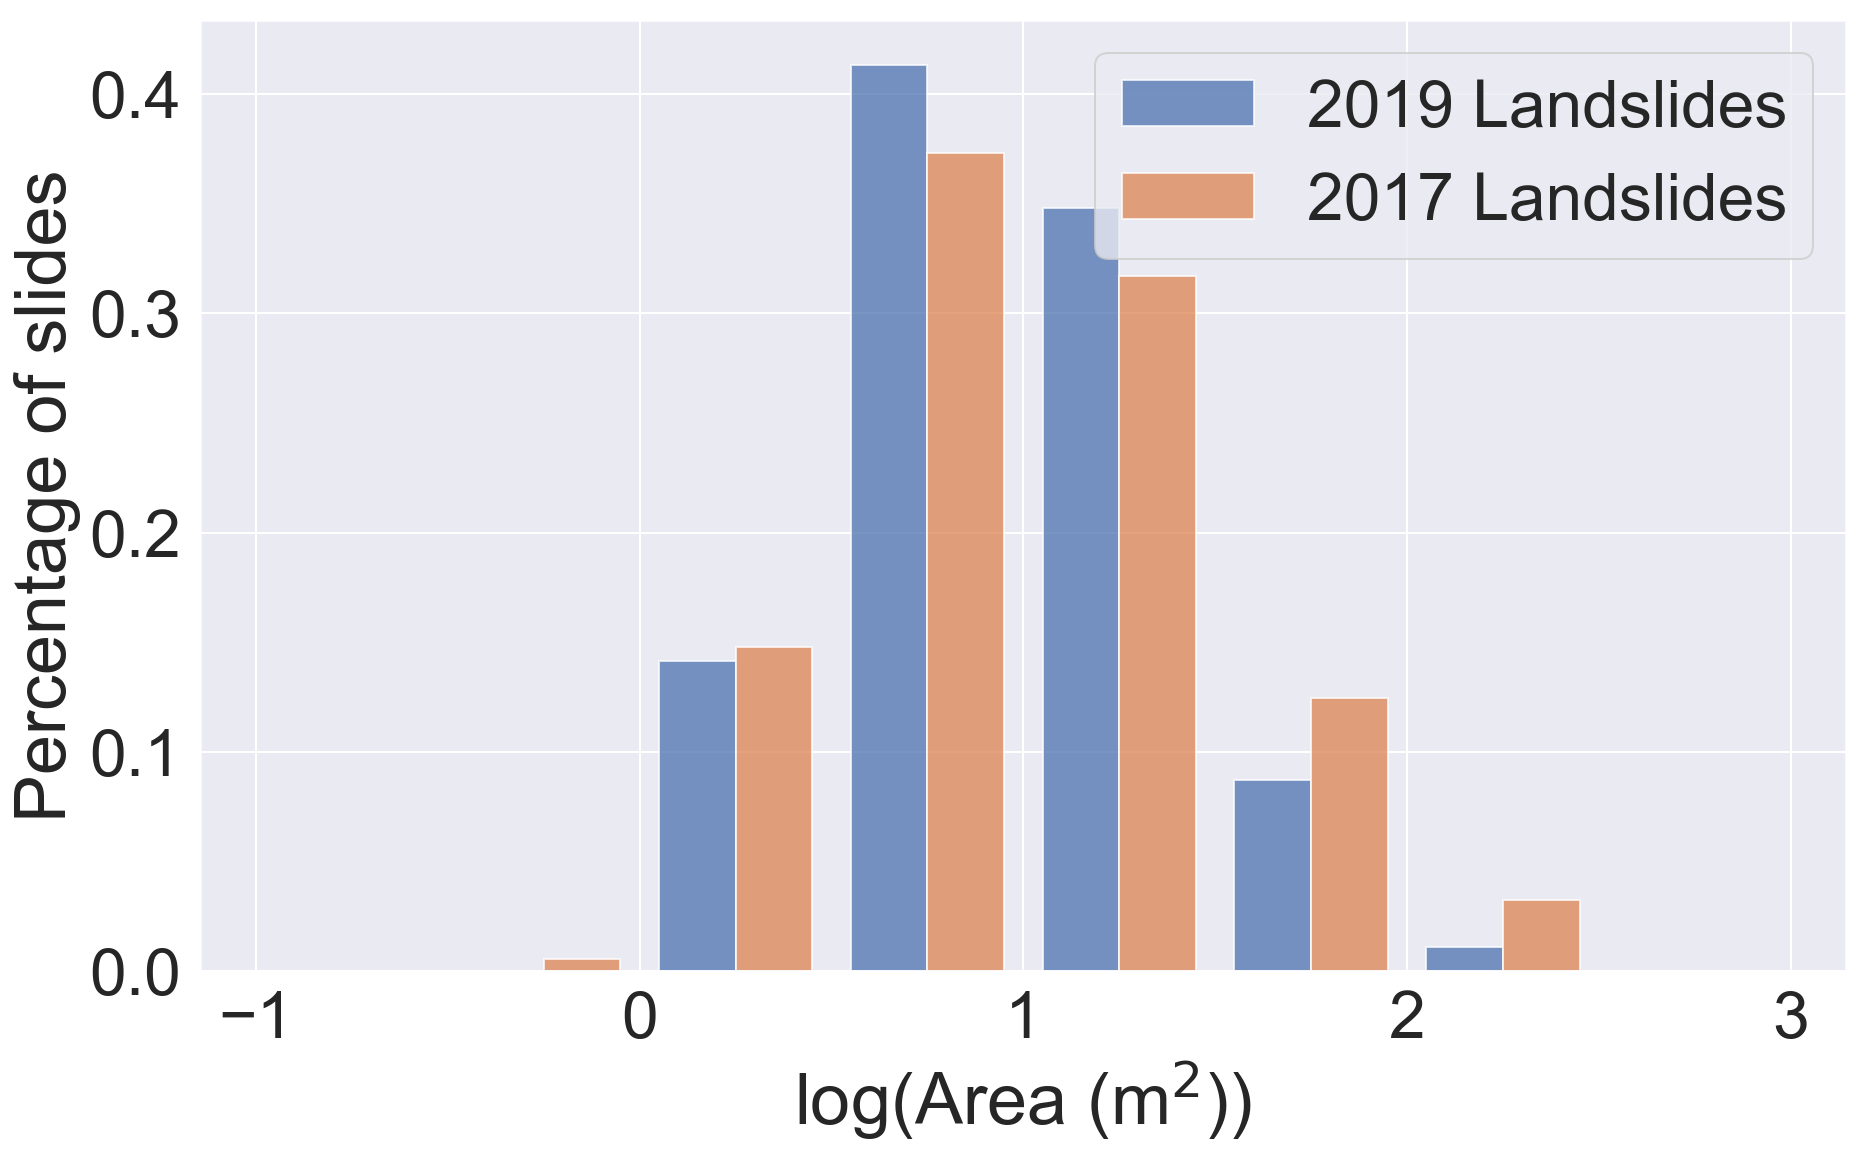

In [9]:
#set area data

areadata2019 = np.log10(geometry2019_fix['SHAPE_Area'])
areadata2017 = np.log10(geometry2017['Shape_Area'])

weightsArea2019 = np.ones_like(areadata2019) / len(areadata2019)
weightsArea2017 = np.ones_like(areadata2017) / len(areadata2017)

#initiate plot
fig, ax = plt.subplots()


area_bins = [-1,-0.5, 0,0.5, 1,1.5, 2,2.5, 3]
# the histogram of the data
ax.hist([areadata2019,areadata2017], area_bins, weights=[weightsArea2019,weightsArea2017]
        , edgecolor='white', alpha=0.75, label=['2019 Landslides','2017 Landslides'])
#ax.hist(areadata2017, area_bins, weights=weightsArea2017, facecolor='orange', edgecolor='white', alpha=0.5, label='2017 Landslides')


plt.xlabel('log(Area (m$^2$))')
plt.ylabel('Percentage of slides')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#save figure
fig.savefig('figures/slide_areaplot.pdf', bbox_inches='tight')

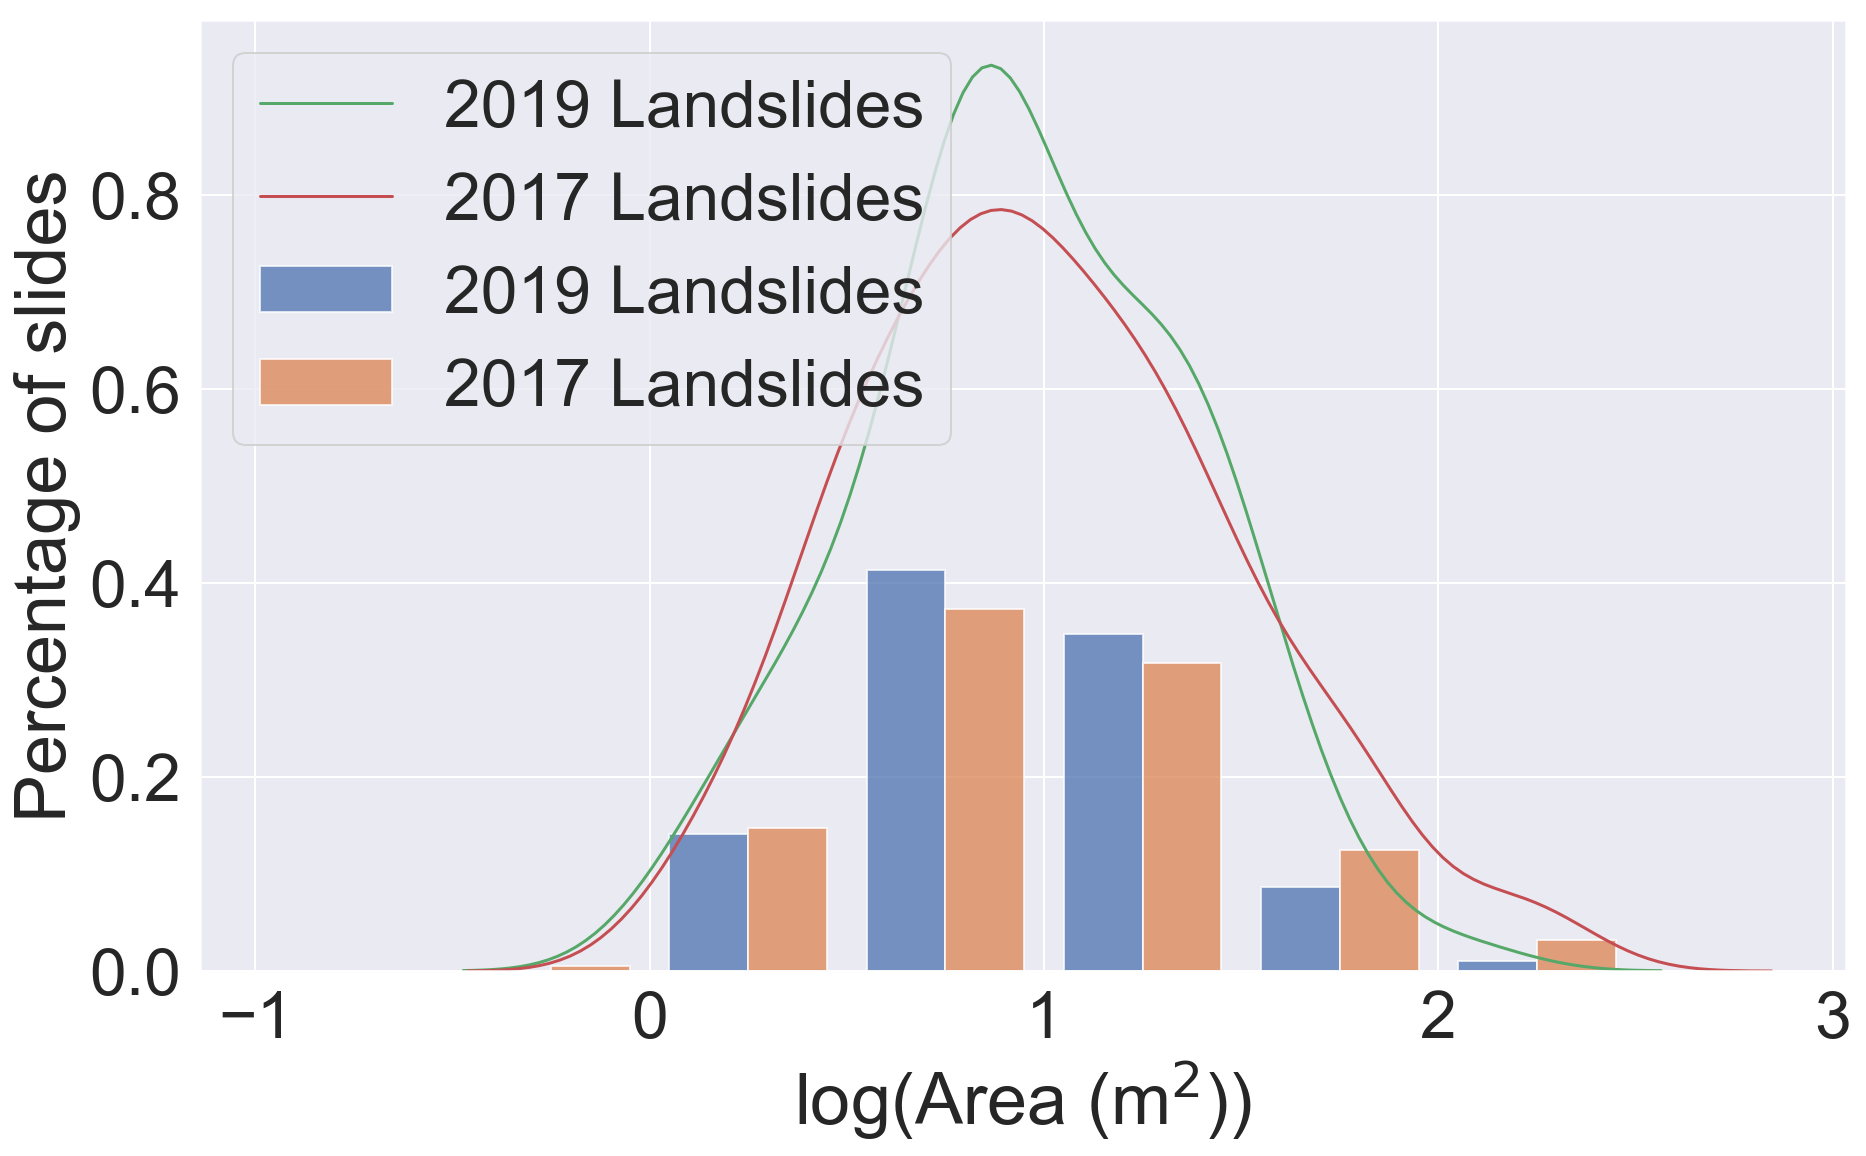

In [10]:
#set area data

sns.set(color_codes=True)
sns.set(font_scale=3)  
areadata2019 = np.log10(geometry2019_fix['SHAPE_Area'])
areadata2017 = np.log10(geometry2017['Shape_Area'])

#initiate plot
fig, ax = plt.subplots()


area_bins = [-1,-0.5,0,0.5,1.0,1.5,2.0,2.5]
ax.hist([areadata2019,areadata2017], area_bins, weights=[weightsArea2019,weightsArea2017]
        , edgecolor='white', alpha=0.75, label=['2019 Landslides','2017 Landslides'])
ax = sns.distplot(areadata2019,hist=False, bins=area_bins, norm_hist=True, label='2019 Landslides')
ax = sns.distplot(areadata2017,hist=False, bins=area_bins, norm_hist=True, label='2017 Landslides')


plt.xlabel('log(Area (m$^2$))')
plt.ylabel('Percentage of slides')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)
#save figure
fig.savefig('figures/kde_slide_areaplot.pdf', bbox_inches='tight')

# slope plot

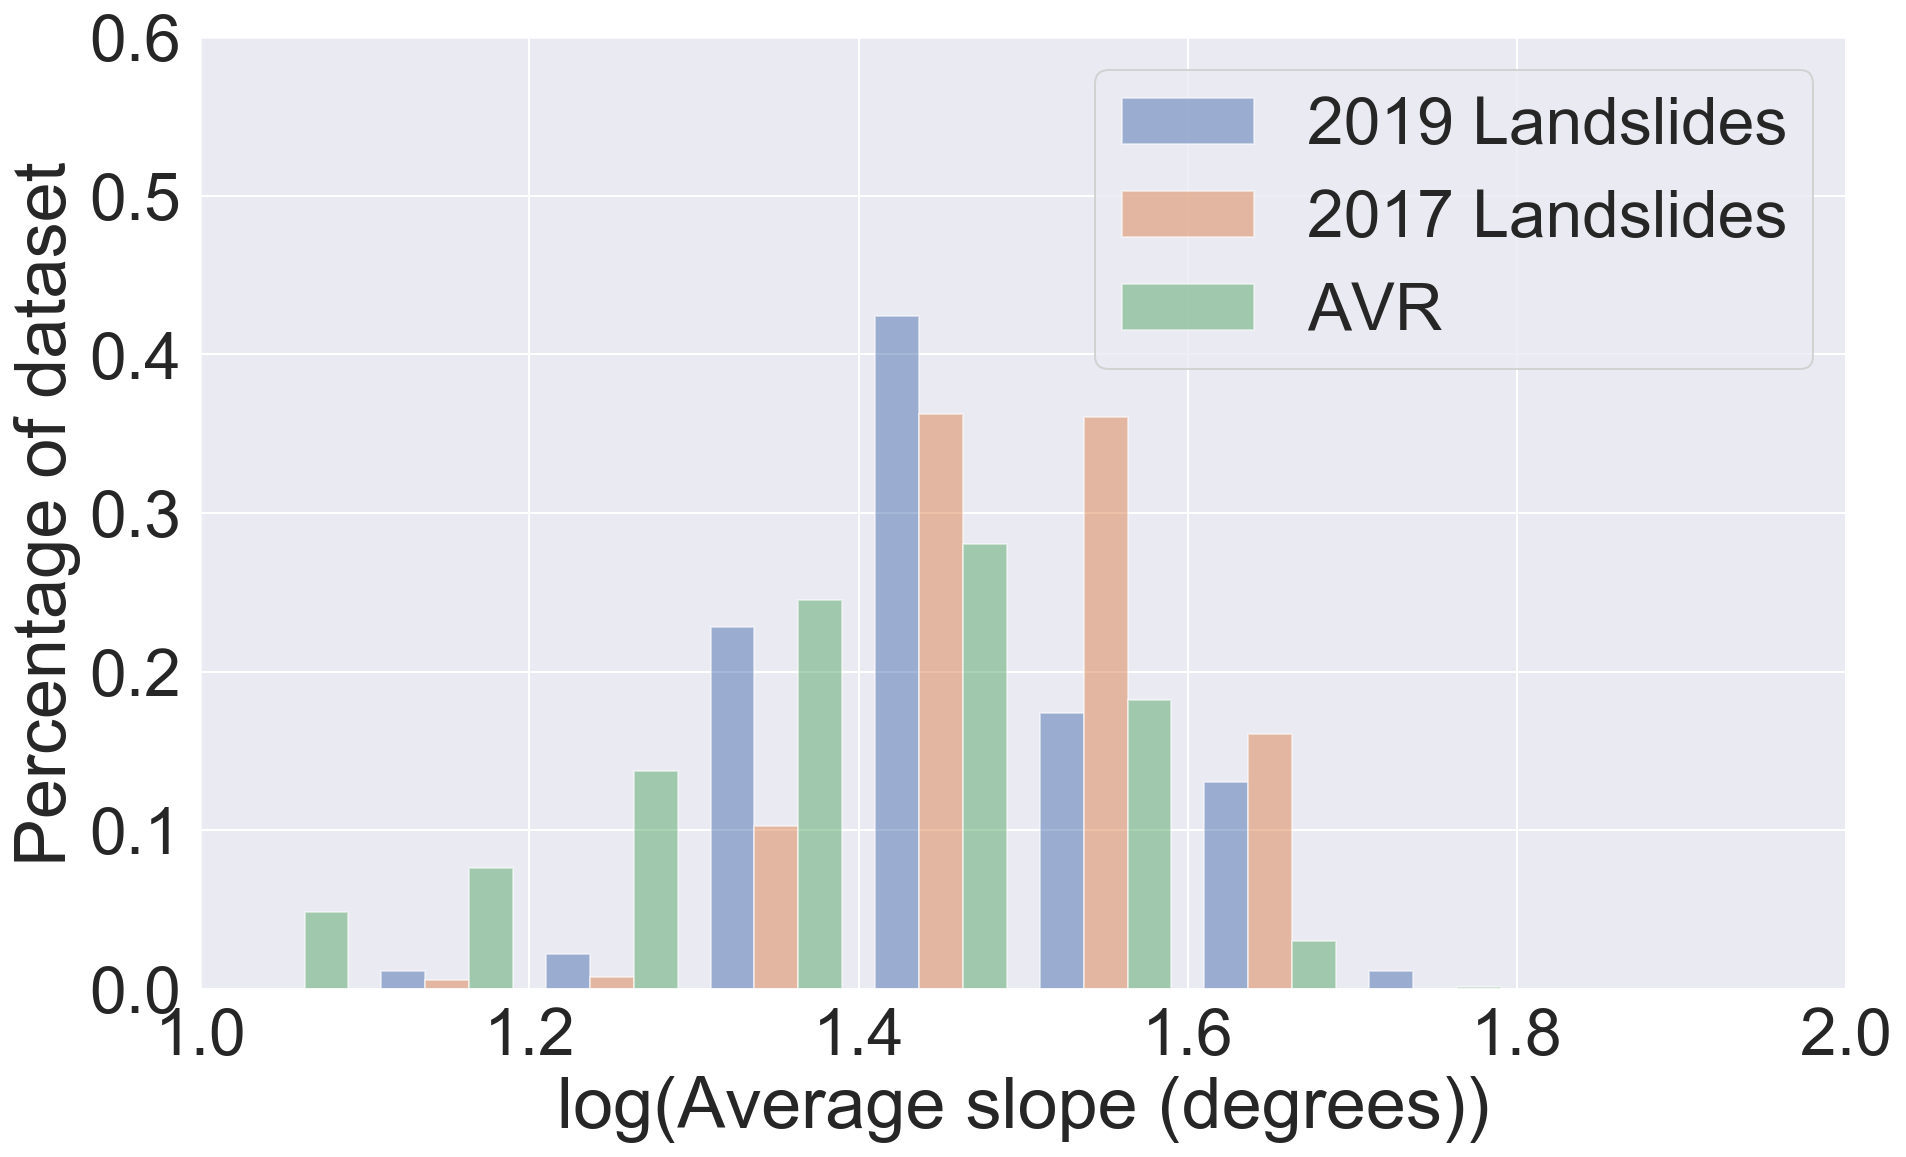

In [37]:
sns.set(font_scale=3)  

slope2019 = np.log10(geometry2019_fix['slope_mean'])
slope2017 = np.log10(geometry2017['slp_mean'])
slopeAVR = np.log10(geometryAVR['slope_mean'])

weightsSlope2019 = np.ones_like(slope2019) / len(slope2019)
weightsSlope2017 = np.ones_like(slope2017) / len(slope2017)
weightsSlopeAVR = np.ones_like(slopeAVR) / len(slopeAVR)

fig = plt.figure()
ax = fig.add_subplot(111)
#ax1 = ax.twinx()
#ax1.grid(None)

ax.set_xlim(1,2)
ax.set_ylim(0, 0.6)
#ax1.set_ylim(0, 4.1)
#ax1.yaxis.set_major_locator(MultipleLocator(0.8))

slope_bins = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

ax.hist([slope2019,slope2017,slopeAVR], slope_bins, weights=[weightsSlope2019,weightsSlope2017,weightsSlopeAVR] 
        ,edgecolor='white', alpha=0.5, label=['2019 Landslides','2017 Landslides','AVR'])

#ax1 = sns.kdeplot(slope2019,label='2019 Landslides')
#ax1 = sns.kdeplot(slope2017,label='2017 Landslides')
#ax1 = sns.kdeplot(slopeAVR,label='AVR')


ax.set_ylabel('Percentage of dataset')
#ax1.set_ylabel('PDE of dataset')
ax.set_xlabel('log(Average slope (degrees))')
ax.legend()

fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)

#save
fig.savefig('figures/landscape_slopeplot.pdf', bbox_inches='tight')

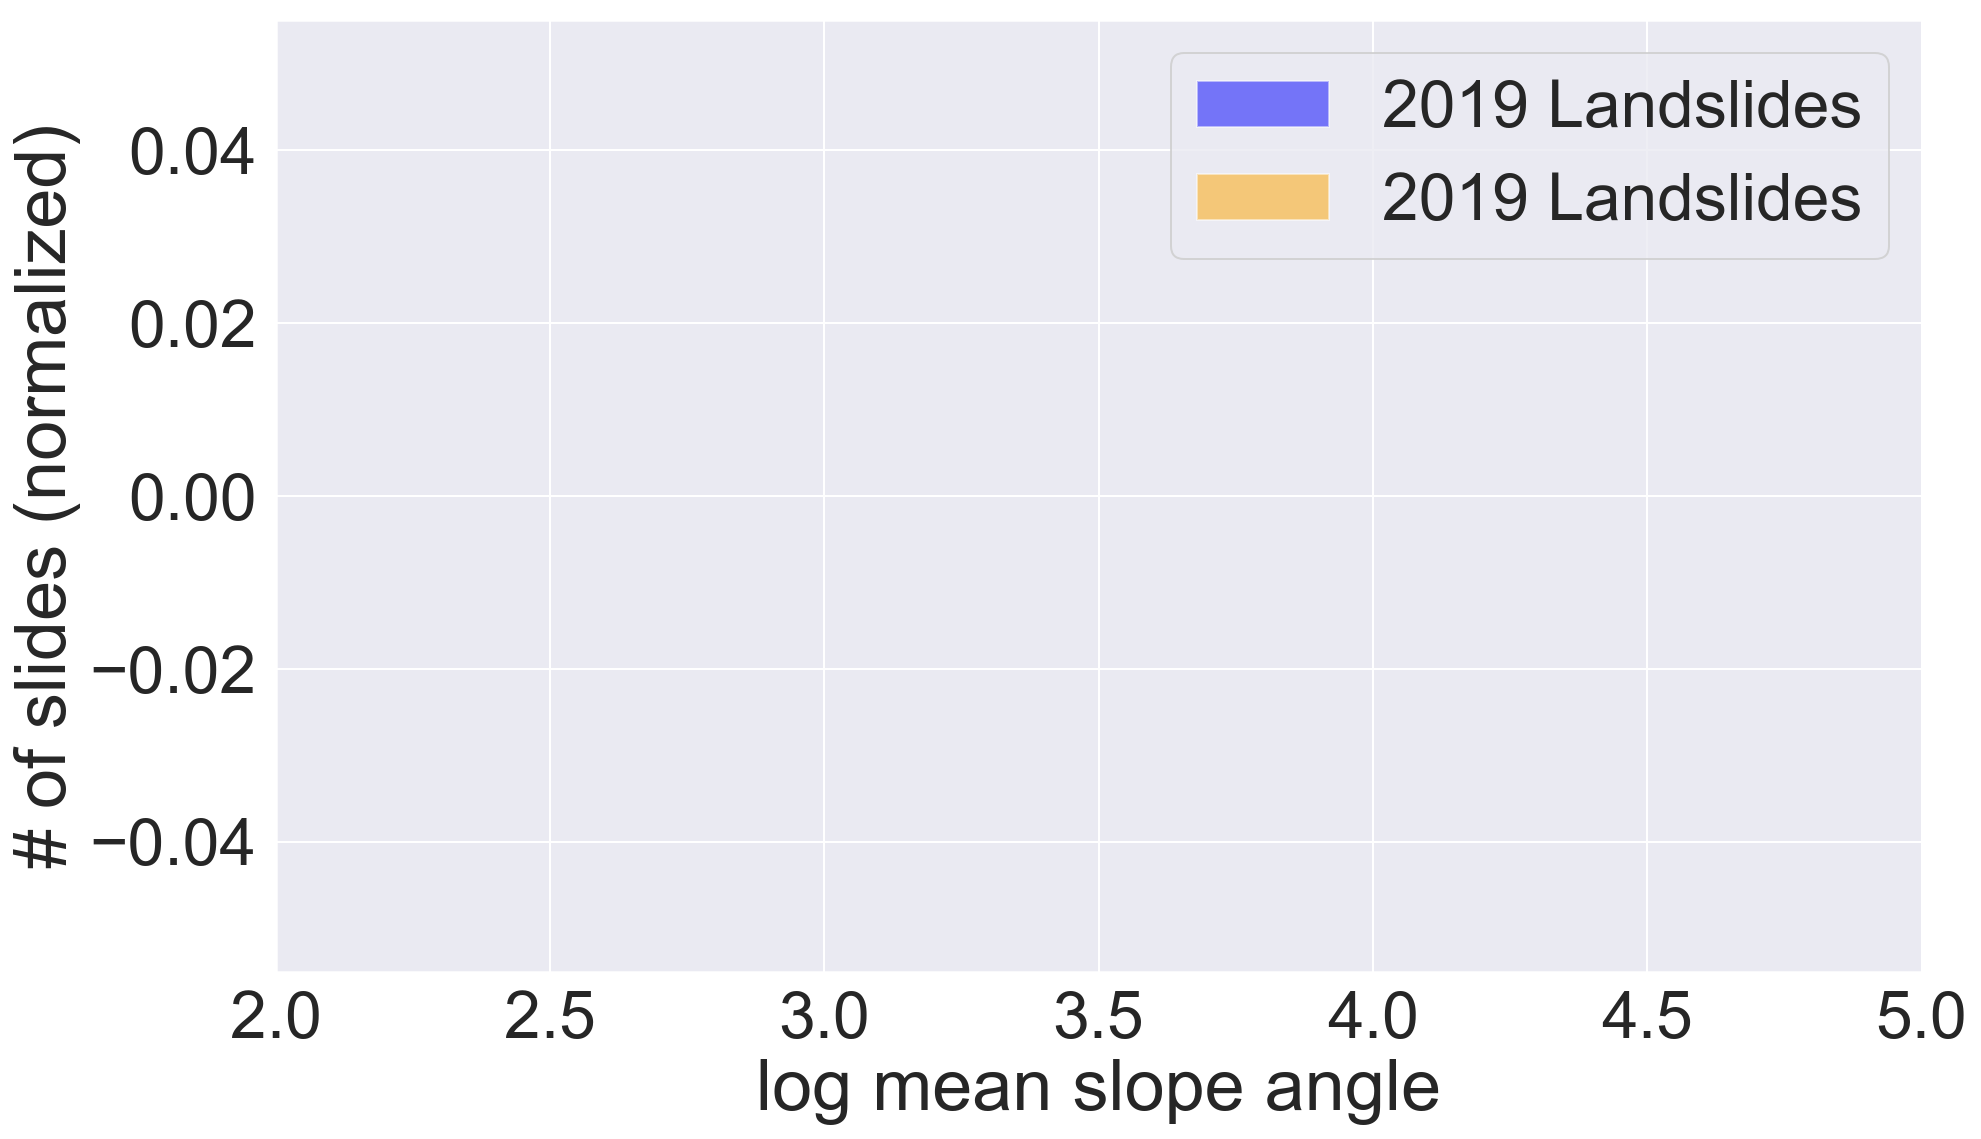

In [38]:
fig, ax = plt.subplots()

ax.set_xlim(2, 5)
ax.set_ylim(0, auto=None)

slope_bins = [2,2.25, 2.5,2.75, 3,3.25, 3.5,3.75, 4]

ax.hist(slope2019, slope_bins, weights=weightsSlope2019, facecolor='blue', edgecolor='white', alpha=0.5, label='2019 Landslides')
ax.hist(slope2017, slope_bins, weights=weightsSlope2017, facecolor='orange', edgecolor='white', alpha=0.5, label='2019 Landslides')


plt.ylabel('# of slides (normalized)')
plt.xlabel('log mean slope angle')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)

#save
fig.savefig('figures/Slide_slopeplot.pdf', bbox_inches='tight')

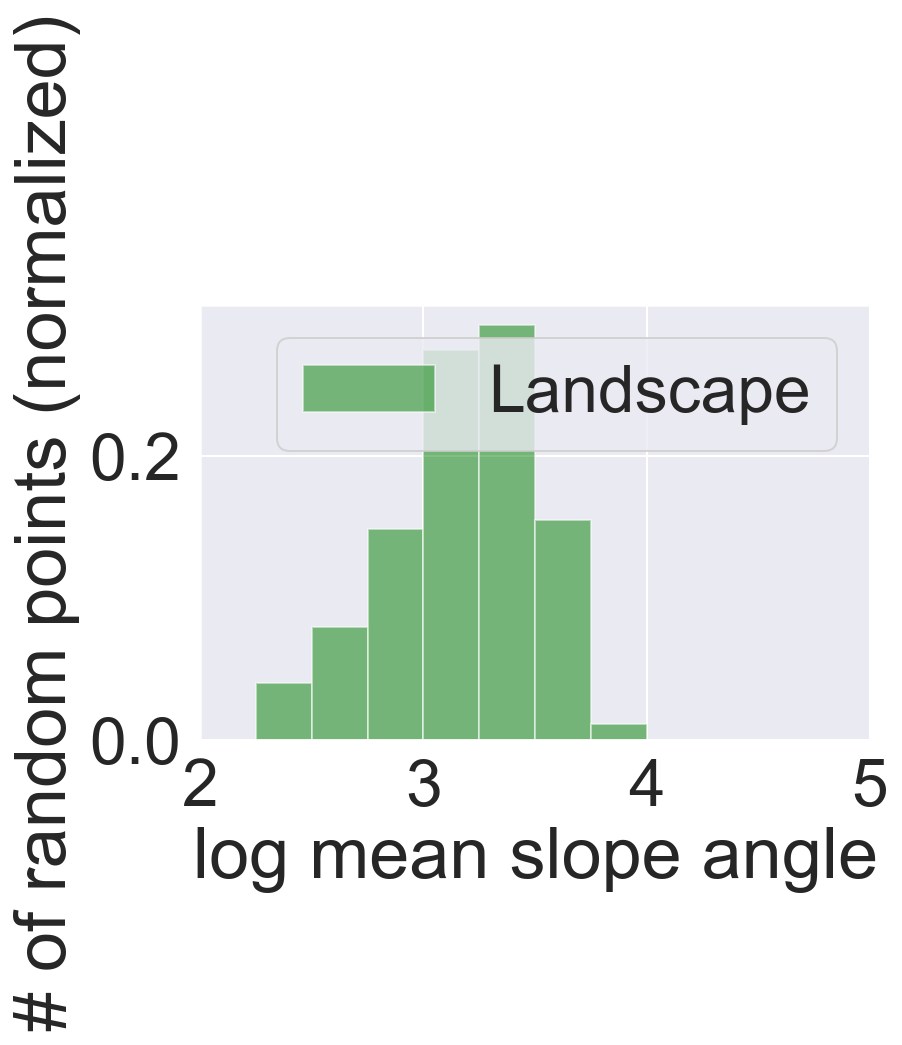

In [13]:
slopeAVR = np.log(geometryAVR['slope_mean'])

fig, ax = plt.subplots()

ax.set_xlim(2, 5)
ax.set_ylim(0, auto=None)

slope_bins = [2,2.25, 2.5,2.75, 3,3.25, 3.5,3.75, 4]

ax.hist(slopeAVR, bins=slope_bins, weights=weightsSlopeAVR, facecolor='green', edgecolor='white', alpha=0.5, label='Landscape')

plt.ylabel('# of random points (normalized)')
plt.xlabel('log mean slope angle')
ax.legend()

fig.savefig('figures/Landscape_slopeplot.pdf', bbox_inches='tight')

# aspect

In [14]:
aspect2019 = pd.read_csv('2019_bounded_values.csv')
aspect2019.head()

,fid,OBJECTID,SHAPE_Leng,SHAPE_Area,Notes,CLASSIFICA,survey_id,id,X,Y,...,DI_range,width,height,area,perimeter,aspect_mean,aspect_min,aspect_max,5m_aspect_min,5m_aspect_max
0,1,43,12.218900,7.256116,NaN,3b,NaN,NaN,NaN,NaN,...,65.410496,5.0639,1.6705,8.459245,13.4688,23.855123,0.398017,52.759655,36.378006,49.168930
1,2,44,21.532105,27.453721,NaN,3b,NaN,NaN,NaN,NaN,...,114.407837,7.1260,5.2858,37.666611,24.8236,80.299924,50.754105,103.344398,80.356880,82.732712
2,3,45,6.228438,2.133133,NaN,3b,NaN,NaN,NaN,NaN,...,38.658516,2.3786,1.4977,3.562429,7.7526,63.137652,46.137062,83.681938,74.660698,87.731850
3,4,46,7.198305,3.125263,NaN,3b,NaN,NaN,NaN,NaN,...,4.488445,2.6451,1.9490,5.155300,9.1882,74.559238,53.688381,85.279343,67.738190,70.485001
4,5,47,12.356075,8.037582,NaN,3b,NaN,NaN,NaN,NaN,...,158.055613,4.4244,3.1323,13.858548,15.1134,56.728730,1.223296,358.966675,44.478336,58.077530


In [15]:
aspect2017 = pd.read_csv('2017_bounded_values.csv')
aspect2017.head()

,area,perimeter,id,survey_id,diff17_19_,diff17_1_1,diff17_1_2,vol_diff,15-19_mean,vol_15-17,DI_sum,DI_mean,DI_max,DI_range,slope_mean,width,height,aspect_mean,aspect_min,aspect_max
0,8.494629,12.379746,203,NaN,0.103984,-0.095959,0.238665,0.883,0.092,0.7858,44445.174229,1269.862121,4428.590820,4424.688177,18.154278,5.0616,2.7839,81.512201,71.064095,98.603424
1,18.382812,18.019792,204,NaN,0.135134,-0.026718,0.245579,2.484,0.169,3.1177,23147.394344,312.802626,1459.248901,1399.424076,25.654776,5.3991,5.8209,345.485469,340.958313,356.400146
2,25.349121,21.257350,205,NaN,0.161985,0.032009,0.277132,4.106,0.269,6.8189,9635.707649,92.651035,192.180542,156.740631,26.549733,5.9052,6.8332,331.730211,325.587860,333.147339
3,21.087402,19.287146,206,NaN,0.130621,-0.007530,0.261532,2.754,0.094,1.9885,4236.653111,49.263408,166.538925,158.546028,27.132617,7.0705,5.5045,309.061642,308.465912,309.288696
4,12.258789,13.552259,207,NaN,0.137865,0.048594,0.217394,1.690,0.033,0.4156,1844.890280,37.650822,91.308006,78.316047,27.590677,4.5080,4.6504,305.693154,305.383972,307.377838


In [16]:
aspectSite = pd.read_csv('aspect_fieldsite_buffer.csv')
aspectSite.head()

,fid,id,aspect_m_1,aspect_m_2,aspect_m_3
0,1.0,0,169.717941,169.717941,169.717941
1,2.0,1,336.669378,332.311493,340.165131
2,3.0,2,213.506741,211.142776,213.855972
3,4.0,3,189.402191,189.402191,189.402191
4,5.0,4,67.763787,59.015289,68.165672


In [17]:
aspect2019['angle_pairs'] = list(zip(aspect2019['5m_aspect_min'], aspect2019['5m_aspect_max']))
aspect2019.head()

,fid,OBJECTID,SHAPE_Leng,SHAPE_Area,Notes,CLASSIFICA,survey_id,id,X,Y,...,width,height,area,perimeter,aspect_mean,aspect_min,aspect_max,5m_aspect_min,5m_aspect_max,angle_pairs
0,1,43,12.218900,7.256116,NaN,3b,NaN,NaN,NaN,NaN,...,5.0639,1.6705,8.459245,13.4688,23.855123,0.398017,52.759655,36.378006,49.168930,"(36.3780059814453, 49.1689300537109)"
1,2,44,21.532105,27.453721,NaN,3b,NaN,NaN,NaN,NaN,...,7.1260,5.2858,37.666611,24.8236,80.299924,50.754105,103.344398,80.356880,82.732712,"(80.3568801879883, 82.7327117919922)"
2,3,45,6.228438,2.133133,NaN,3b,NaN,NaN,NaN,NaN,...,2.3786,1.4977,3.562429,7.7526,63.137652,46.137062,83.681938,74.660698,87.731850,"(74.6606979370117, 87.7318496704102)"
3,4,46,7.198305,3.125263,NaN,3b,NaN,NaN,NaN,NaN,...,2.6451,1.9490,5.155300,9.1882,74.559238,53.688381,85.279343,67.738190,70.485001,"(67.73818969726561, 70.48500061035159)"
4,5,47,12.356075,8.037582,NaN,3b,NaN,NaN,NaN,NaN,...,4.4244,3.1323,13.858548,15.1134,56.728730,1.223296,358.966675,44.478336,58.077530,"(44.478336334228494, 58.0775299072266)"


In [18]:
aspect2017['angle_pairs'] = list(zip(aspect2017['aspect_min'], aspect2017['aspect_max']))
aspect2017.head()

,area,perimeter,id,survey_id,diff17_19_,diff17_1_1,diff17_1_2,vol_diff,15-19_mean,vol_15-17,...,DI_mean,DI_max,DI_range,slope_mean,width,height,aspect_mean,aspect_min,aspect_max,angle_pairs
0,8.494629,12.379746,203,NaN,0.103984,-0.095959,0.238665,0.883,0.092,0.7858,...,1269.862121,4428.590820,4424.688177,18.154278,5.0616,2.7839,81.512201,71.064095,98.603424,"(71.064094543457, 98.60342407226558)"
1,18.382812,18.019792,204,NaN,0.135134,-0.026718,0.245579,2.484,0.169,3.1177,...,312.802626,1459.248901,1399.424076,25.654776,5.3991,5.8209,345.485469,340.958313,356.400146,"(340.95831298828097, 356.400146484375)"
2,25.349121,21.257350,205,NaN,0.161985,0.032009,0.277132,4.106,0.269,6.8189,...,92.651035,192.180542,156.740631,26.549733,5.9052,6.8332,331.730211,325.587860,333.147339,"(325.587860107422, 333.147338867188)"
3,21.087402,19.287146,206,NaN,0.130621,-0.007530,0.261532,2.754,0.094,1.9885,...,49.263408,166.538925,158.546028,27.132617,7.0705,5.5045,309.061642,308.465912,309.288696,"(308.465911865234, 309.288696289063)"
4,12.258789,13.552259,207,NaN,0.137865,0.048594,0.217394,1.690,0.033,0.4156,...,37.650822,91.308006,78.316047,27.590677,4.5080,4.6504,305.693154,305.383972,307.377838,"(305.38397216796903, 307.377838134766)"


In [19]:
#aspectSite['angle_pairs'] = list(zip(aspectSite['aspect_min'], aspectSite['aspect_max']))
#aspectSite.head()

In [20]:
""" 
CircularMean 
Author: Dan.Patterson@carleton.ca 
Date:     Aug 2013 
Modified: Sept 2015 
Purpose: 
  To calculate the mean (average) for points along a circle using the  
  angular measure to these points from the center of the circle 
Notes: 
  If the angles are given in degrees then there is no need to convert 
  If the units are time, such as hours (24 hour clock) or months (12) then 
  these need to be converted by 
    angle in degrees = time quantity / number of equal intervals 
    ie 0.5 = (12 hours / 24 hours per day) 
    or 180 degrees 
required modules 
numpy, math 
"""   

#def circ_mean(angles):  
#    """angles in degrees" 
#    """  
#    cosList = []  
#    cosSum = 0.0  
#    sinSum = 0.0  
#    for i in angles:  
#        theCos = math.cos(math.radians(float(i)))  
#        theSin = math.sin(math.radians(float(i)))  
#        cosSum += theCos  
#        sinSum += theSin  
#    N = len(angles)  
#    C = cosSum/N  
#    S = sinSum/N  
#    theMean = math.atan2(S,C)  
#    if theMean < 0.0:  
#       theMean += math.radians(360.0)  
#    return theMean  

def circ_mean_np(angles,azimuth=True):  
    """ numpy version of above"""  
    rads = np.deg2rad(angles)  
    av_sin = np.mean(np.sin(rads))  
    av_cos = np.mean(np.cos(rads))  
    ang_rad = np.arctan2(av_sin,av_cos)  
    ang_deg = np.rad2deg(ang_rad)  
    if azimuth:  
        ang_deg = np.mod(ang_deg,360.)  
    return ang_rad, ang_deg  

if __name__ == "__main__":  
  
    Data = aspect2019['angle_pairs']
    
#    print("\nCircular Mean Demo...python version\n")  
#    frmt ="{:15s}{:15s}{:15s}"  
#    print(frmt.format("angles", "Mean radians", "Mean degrees"))  
#    for angles in sampleData:  
#        theMean = circ_mean(angles)  
#        args = (angles, theMean, math.degrees(theMean))  
#        print("{!s:>15}{:>12.4}{:>15.4}".format(*args))  
   
    aspect2019_mean_new = []
    print("\nCircular Mean Demo...numpy version\n")  
    frmt ="{:15s}{:15s}{:15s}"  
    print("Mean degrees")  
    #  
    for angles in Data:  
        aspect2019_mean_new.append(circ_mean_np(angles))


Circular Mean Demo...numpy version

Mean degrees


In [21]:
""" 
CircularMean 
Author: Dan.Patterson@carleton.ca 
Date:     Aug 2013 
Modified: Sept 2015 
Purpose: 
  To calculate the mean (average) for points along a circle using the  
  angular measure to these points from the center of the circle 
Notes: 
  If the angles are given in degrees then there is no need to convert 
  If the units are time, such as hours (24 hour clock) or months (12) then 
  these need to be converted by 
    angle in degrees = time quantity / number of equal intervals 
    ie 0.5 = (12 hours / 24 hours per day) 
    or 180 degrees 
required modules 
numpy, math 
"""   

#def circ_mean(angles):  
#    """angles in degrees" 
#    """  
#    cosList = []  
#    cosSum = 0.0  
#    sinSum = 0.0  
#    for i in angles:  
#        theCos = math.cos(math.radians(float(i)))  
#        theSin = math.sin(math.radians(float(i)))  
#        cosSum += theCos  
#        sinSum += theSin  
#    N = len(angles)  
#    C = cosSum/N  
#    S = sinSum/N  
#    theMean = math.atan2(S,C)  
#    if theMean < 0.0:  
#       theMean += math.radians(360.0)  
#    return theMean  

def circ_mean_np(angles,azimuth=True):  
    """ numpy version of above"""  
    rads = np.deg2rad(angles)  
    av_sin = np.mean(np.sin(rads))  
    av_cos = np.mean(np.cos(rads))  
    ang_rad = np.arctan2(av_sin,av_cos)  
    ang_deg = np.rad2deg(ang_rad)  
    if azimuth:  
        ang_deg = np.mod(ang_deg,360.)  
    return ang_rad, ang_deg  

if __name__ == "__main__":  
  
    Data = aspect2017['angle_pairs']
    
#    print("\nCircular Mean Demo...python version\n")  
#    frmt ="{:15s}{:15s}{:15s}"  
#    print(frmt.format("angles", "Mean radians", "Mean degrees"))  
#    for angles in sampleData:  
#        theMean = circ_mean(angles)  
#        args = (angles, theMean, math.degrees(theMean))  
#        print("{!s:>15}{:>12.4}{:>15.4}".format(*args))  
   
    aspect2017_mean_new = []
    print("\nCircular Mean Demo...numpy version\n")  
    frmt ="{:15s}{:15s}{:15s}"  
    print("Mean degrees")  
    #  
    for angles in Data:  
        aspect2017_mean_new.append(circ_mean_np(angles))


Circular Mean Demo...numpy version

Mean degrees


In [22]:
corr2019_radian_mean = []
corr2019_degree_mean = []
corr2019_radian_mean, corr2019_degree_mean = map(list, zip(*aspect2019_mean_new))

In [23]:
corr2017_radian_mean = []
corr2017_degree_mean = []
corr2017_radian_mean, corr2017_degree_mean = map(list, zip(*aspect2017_mean_new))

In [24]:
aspect2019['corr_aspect_mean'] = corr2019_degree_mean
aspect2019['corr_aspect_mean'] = aspect2019['corr_aspect_mean'].dropna()

aspect2019.head()

,fid,OBJECTID,SHAPE_Leng,SHAPE_Area,Notes,CLASSIFICA,survey_id,id,X,Y,...,height,area,perimeter,aspect_mean,aspect_min,aspect_max,5m_aspect_min,5m_aspect_max,angle_pairs,corr_aspect_mean
0,1,43,12.218900,7.256116,NaN,3b,NaN,NaN,NaN,NaN,...,1.6705,8.459245,13.4688,23.855123,0.398017,52.759655,36.378006,49.168930,"(36.3780059814453, 49.1689300537109)",42.773468
1,2,44,21.532105,27.453721,NaN,3b,NaN,NaN,NaN,NaN,...,5.2858,37.666611,24.8236,80.299924,50.754105,103.344398,80.356880,82.732712,"(80.3568801879883, 82.7327117919922)",81.544796
2,3,45,6.228438,2.133133,NaN,3b,NaN,NaN,NaN,NaN,...,1.4977,3.562429,7.7526,63.137652,46.137062,83.681938,74.660698,87.731850,"(74.6606979370117, 87.7318496704102)",81.196274
3,4,46,7.198305,3.125263,NaN,3b,NaN,NaN,NaN,NaN,...,1.9490,5.155300,9.1882,74.559238,53.688381,85.279343,67.738190,70.485001,"(67.73818969726561, 70.48500061035159)",69.111595
4,5,47,12.356075,8.037582,NaN,3b,NaN,NaN,NaN,NaN,...,3.1323,13.858548,15.1134,56.728730,1.223296,358.966675,44.478336,58.077530,"(44.478336334228494, 58.0775299072266)",51.277933


In [25]:
aspect2017['corr_aspect_mean'] = corr2017_degree_mean
aspect2017['corr_aspect_mean'] = aspect2017['corr_aspect_mean'].dropna()
aspect2017.head()

,area,perimeter,id,survey_id,diff17_19_,diff17_1_1,diff17_1_2,vol_diff,15-19_mean,vol_15-17,...,DI_max,DI_range,slope_mean,width,height,aspect_mean,aspect_min,aspect_max,angle_pairs,corr_aspect_mean
0,8.494629,12.379746,203,NaN,0.103984,-0.095959,0.238665,0.883,0.092,0.7858,...,4428.590820,4424.688177,18.154278,5.0616,2.7839,81.512201,71.064095,98.603424,"(71.064094543457, 98.60342407226558)",84.833759
1,18.382812,18.019792,204,NaN,0.135134,-0.026718,0.245579,2.484,0.169,3.1177,...,1459.248901,1399.424076,25.654776,5.3991,5.8209,345.485469,340.958313,356.400146,"(340.95831298828097, 356.400146484375)",348.679230
2,25.349121,21.257350,205,NaN,0.161985,0.032009,0.277132,4.106,0.269,6.8189,...,192.180542,156.740631,26.549733,5.9052,6.8332,331.730211,325.587860,333.147339,"(325.587860107422, 333.147338867188)",329.367599
3,21.087402,19.287146,206,NaN,0.130621,-0.007530,0.261532,2.754,0.094,1.9885,...,166.538925,158.546028,27.132617,7.0705,5.5045,309.061642,308.465912,309.288696,"(308.465911865234, 309.288696289063)",308.877304
4,12.258789,13.552259,207,NaN,0.137865,0.048594,0.217394,1.690,0.033,0.4156,...,91.308006,78.316047,27.590677,4.5080,4.6504,305.693154,305.383972,307.377838,"(305.38397216796903, 307.377838134766)",306.380905


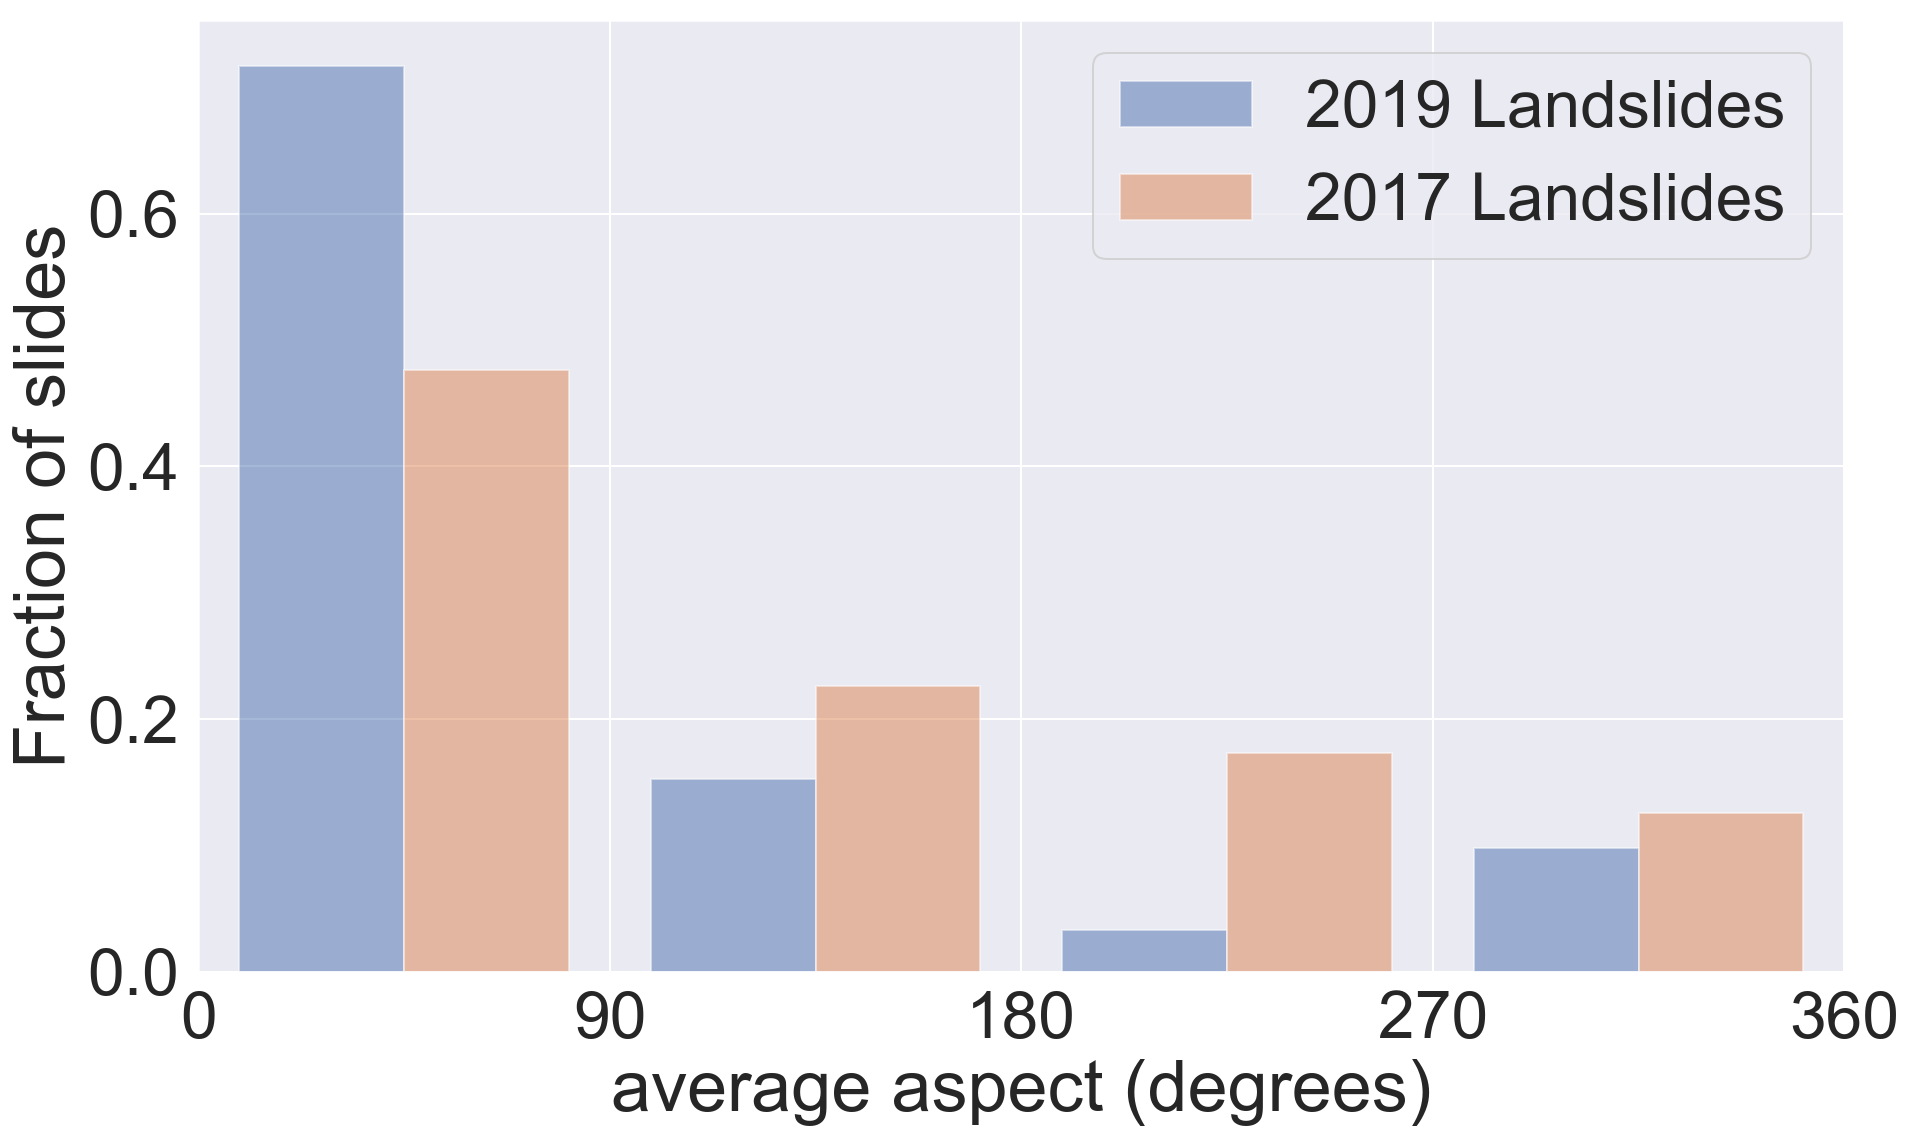

In [26]:
fig, ax = plt.subplots()

ax.set_xlim(0,360)
ax.xaxis.set_major_locator(MultipleLocator(90))

aspect_bins = [0,90,180,270,360]

weightsAspect2019 = np.ones_like(aspect2019['corr_aspect_mean']) / len(aspect2019['corr_aspect_mean'])
weightsAspect2017 = np.ones_like(aspect2017['corr_aspect_mean']) / len(aspect2017['corr_aspect_mean'])

ax.hist([aspect2019['corr_aspect_mean'],aspect2017['corr_aspect_mean']],weights=[weightsAspect2019,weightsAspect2017],
         bins=aspect_bins, edgecolor='white', alpha=0.5, label=['2019 Landslides','2017 Landslides'])
#weights=[weightsAspect2019,weightsAspect2017]

plt.ylabel('Fraction of slides')
plt.xlabel('average aspect (degrees)')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)

#save
fig.savefig('figures/slide_aspectplot.pdf', bbox_inches='tight')

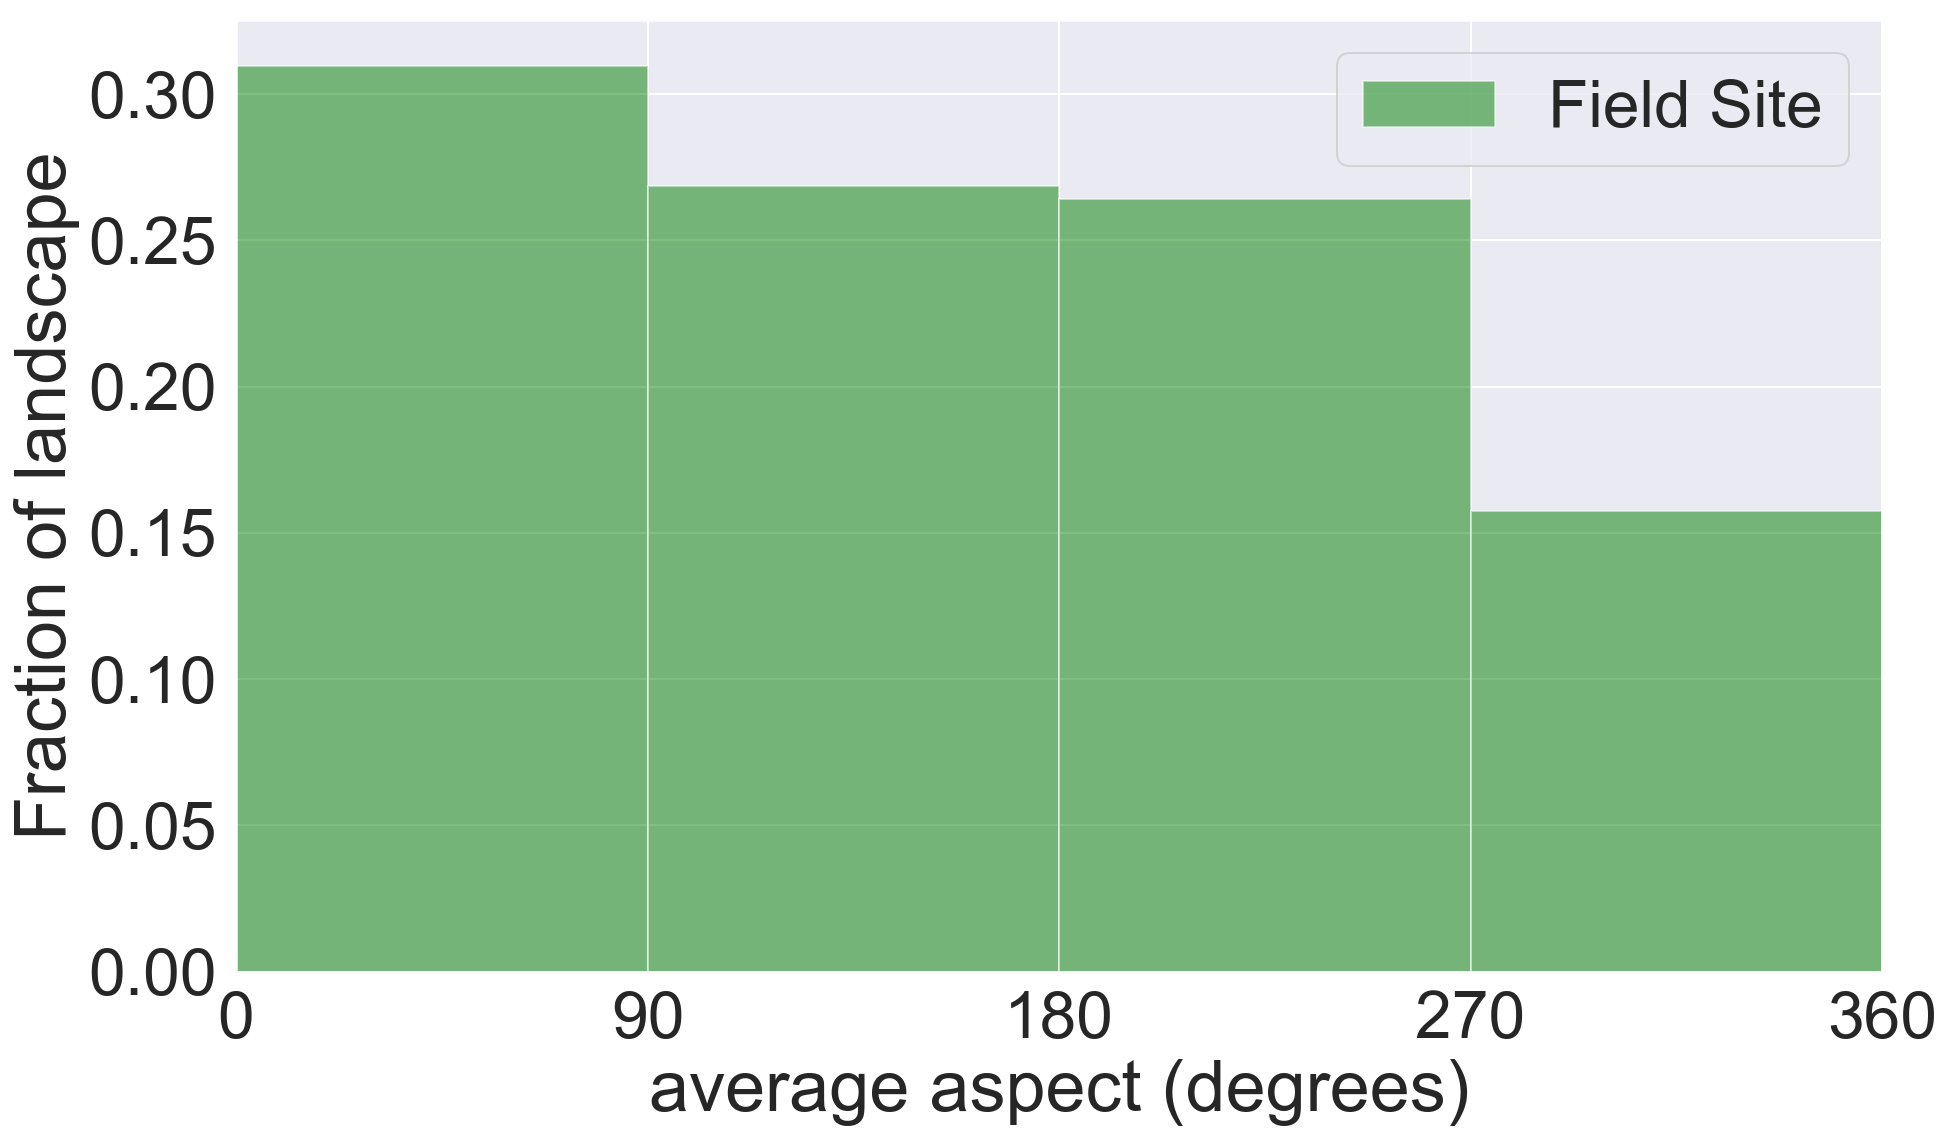

In [31]:
fig, ax = plt.subplots()

ax.set_xlim(0,360)
ax.xaxis.set_major_locator(MultipleLocator(90))

aspect_bins = [0,90,180,270,360]

weightsAspectSite = np.ones_like(aspectSite['aspect_m_1']) / len(aspectSite['aspect_m_1'])

ax.hist(aspectSite['aspect_m_1'],weights=weightsAspectSite, facecolor='green',
         bins=aspect_bins,alpha=0.5, label=['Field Site'])

plt.ylabel('Fraction of landscape')
plt.xlabel('average aspect (degrees)')
ax.legend()


fig = plt.gcf()
fig.set_size_inches(14.75, 8.75)

#save
fig.savefig('figures/site_aspectplot.pdf', bbox_inches='tight')

# statistics

#### slope

In [39]:
mean_slope2019 = np.mean(geometry2019_fix['slope_mean'])
mean_slope2017 = np.mean(geometry2017['slp_mean'])

median_slope2019 = np.median(geometry2019_fix['slope_mean'])
median_slope2017 = np.median(geometry2017['slp_mean'])

stdev_slope2019 = np.std(geometry2019_fix['slope_mean'])
stdev_slope2017 = np.std(geometry2017['slp_mean'])

print(" mean of 2019 slopes:", mean_slope2019)
print(" mean of 2017 slopes:", mean_slope2017)
print(" median of 2019 slopes:", median_slope2019)
print(" median of 2017 slopes:", median_slope2017)
print(" stdev of 2019 slopes:", stdev_slope2019)
print(" stdev of 2017 slopes:", stdev_slope2017)


mean_log_slope2019 = np.mean(slope2019)
mean_log_slope2017 = np.mean(slope2017)

median_log_slope2019 = np.median(slope2019)
median_log_slope2017 = np.median(slope2017)

stdev_log_slope2019 = np.std(slope2019)
stdev_log_slope2017 = np.std(slope2017)

print("Log transformed mean of 2019 slopes:", 10**mean_log_slope2019)
print("Log transformed mean of 2017 slopes:", 10**mean_log_slope2017)

print("Log transformed median of 2019 slopes:", 10**median_log_slope2019)
print("Log transformed median of 2017 slopes:", 10**median_log_slope2017)

print("Log transformed stdev of 2019 slopes:", 10**stdev_log_slope2019)
print("Log transformed stdev of 2017 slopes:", 10**stdev_log_slope2017)

 mean of 2019 slopes: 30.102116418833933
 mean of 2017 slopes: 32.53307338645227
 median of 2019 slopes: 28.23549425141951
 median of 2017 slopes: 32.11717033
 stdev of 2019 slopes: 7.573481644848846
 stdev of 2017 slopes: 6.504691217997661
Log transformed mean of 2019 slopes: 29.209742337079508
Log transformed mean of 2017 slopes: 31.80300832247001
Log transformed median of 2019 slopes: 28.235489834495358
Log transformed median of 2017 slopes: 32.11717032999999
Log transformed stdev of 2019 slopes: 1.2765099003045708
Log transformed stdev of 2017 slopes: 1.2549062807453293


#### area

In [35]:
print ("max of 2019 area:", geometry2019_fix['SHAPE_Area'].max() )
print ("min of 2019 area:", geometry2019_fix['SHAPE_Area'].min() )

print ("max of 2017 area:", geometry2017['Shape_Area'].max() )
print ("min of 2017 area:", geometry2017['Shape_Area'].min() )

mean_area2019 = np.mean(geometry2019_fix['SHAPE_Area'])
mean_area2017 = np.mean(geometry2017['Shape_Area'])

median_area2019 = np.median(geometry2019_fix['SHAPE_Area'])
median_area2017 = np.median(geometry2017['Shape_Area'])

stdev_area2019 = np.std(geometry2019_fix['SHAPE_Area'])
stdev_area2017 = np.std(geometry2017['Shape_Area'])

print(" mean of 2019 areas:", mean_area2019)
print(" mean of 2017 areas:", mean_area2017)
print(" median of 2019 areas:", median_area2019)
print(" median of 2017 areas:", median_area2017)
print(" stdev of 2019 areas:", stdev_area2019)
print(" stdev of 2017 areas:", stdev_area2017)


mean_log_area2019 = np.mean(areadata2019)
mean_log_area2017 = np.mean(areadata2017)

median_log_area2019 = np.median(areadata2019)
median_log_area2017 = np.median(areadata2017)

stdev_log_area2019 = np.std(areadata2019)
stdev_log_area2017 = np.std(areadata2017)

print("Log transformed mean of 2019 areas:", 10**mean_log_area2019)
print("Log transformed mean of 2017 areas:", 10**mean_log_area2017)

print("Log transformed median of 2019 areas:", 10**median_log_area2019)
print("Log transformed median of 2017 areas:", 10**median_log_area2017)

print("Log transformed stdev of 2019 areas:", 10**stdev_log_area2019)
print("Log transformed stdev of 2017 areas:", 10**stdev_log_area2017)

max of 2019 area: 114.121386004
min of 2019 area: 1.0831395750700001
max of 2017 area: 257.9258349
min of 2017 area: 0.9357903740000001
 mean of 2019 areas: 14.110686627992505
 mean of 2017 areas: 20.072566419684684
 median of 2019 areas: 8.125755407965
 median of 2017 areas: 9.136455652999999
 stdev of 2019 areas: 15.657486912418195
 stdev of 2017 areas: 31.476337135045313
Log transformed mean of 2019 areas: 9.132566784135562
Log transformed mean of 2017 areas: 10.228214354964761
Log transformed median of 2019 areas: 8.125277007310482
Log transformed median of 2017 areas: 9.136455652999999
Log transformed stdev of 2019 areas: 2.5589406688861644
Log transformed stdev of 2017 areas: 3.0401219808209783
